## Контрольная работа
Вариант 11


In [24]:
import numpy as np
from scipy import integrate
from typing import Callable
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', context='notebook', palette=tuple(colors), 
        rc={'axes.labelsize': 16})

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

### Номер 2

In [63]:
def g(x:np.double,a:np.double,sigma:np.double,beta:np.double) -> np.double:
    """
    Calculates generated gaussian
    """
    return np.exp(-0.5 * ((x-a)/sigma)**(2*beta))

def closest(g:np.vectorize, *args):
    """
    Finds indicator function for closest set for given fuzzy set
    """
    return np.where(g(*args) >= 0.5, 1, 0)

def Hamming(a:np.array, b:np.array) -> np.double:
    """
    Calculates Hamming distance
    """
    return np.abs(a-b).sum()

def linear_fuzzy_index(g:np.vectorize, n:np.int, *args) -> np.double:
    """
    Calculates linear fuzzy index
    """
    A = g(*args)
    closest_A = closest(g,*args)
    dist = Hamming(A,closest_A)
    return 1/n * dist

Проверим, что все работает:

In [65]:
a = 0
sigma = 1
beta = 1
n = 100
domain = np.linspace(-10,10,n)
vect_g = np.vectorize(g)
index = linear_fuzzy_index(vect_g,n, domain,a,sigma,beta)
index

Сначала найдем зависимость $ \nu $ от $a$:

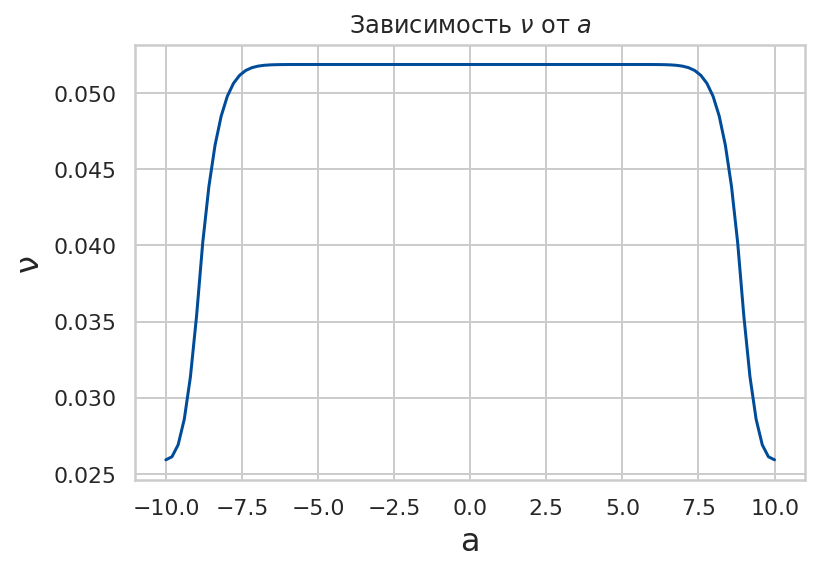

In [67]:
aa = np.linspace(-10,10,100)
vals = []
for a in aa:
    vals.append(linear_fuzzy_index(vect_g,n, domain,a,sigma,beta))
    
plt.plot(aa, vals, color = '#004C99')
plt.xlabel('a')
plt.ylabel('ν')
plt.title('Зависимость $ν$ от $a$')
plt.savefig('data/2ndtaskwitha.png')
plt.show()

Теперь найдем зависимость $\nu$ от $\sigma$: 

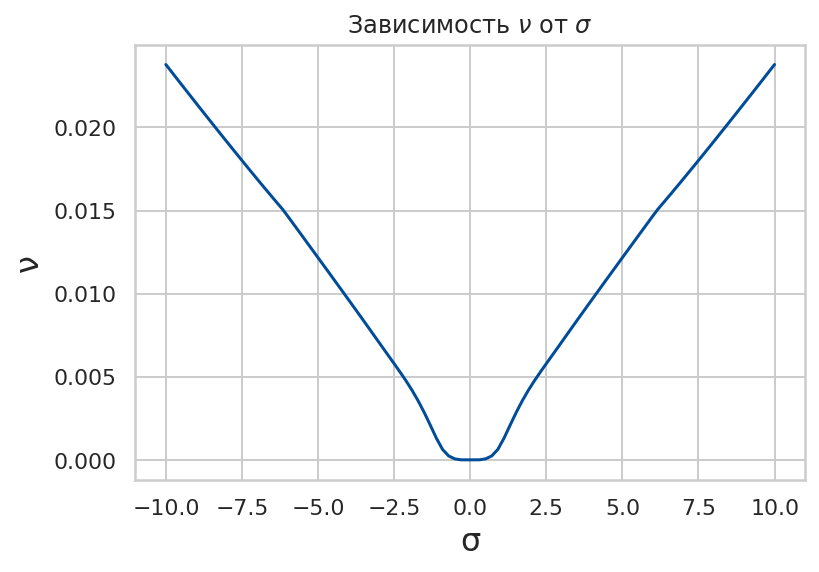

In [79]:
sigmas = np.linspace(-10,10,100)
vals = []
for sigma in sigmas:
    vals.append(linear_fuzzy_index(vect_g,n, domain,a,sigma,beta))
    
plt.plot(sigmas, vals, color = '#004C99')
plt.xlabel('σ')
plt.ylabel('ν')
plt.title('Зависимость $ν$ от $σ$')
plt.savefig('data/2ndtaskwithsigma.png')
plt.show()

А теперь -- зависимость $\nu$ от $\beta$($\beta \in \mathbb{Z}$):

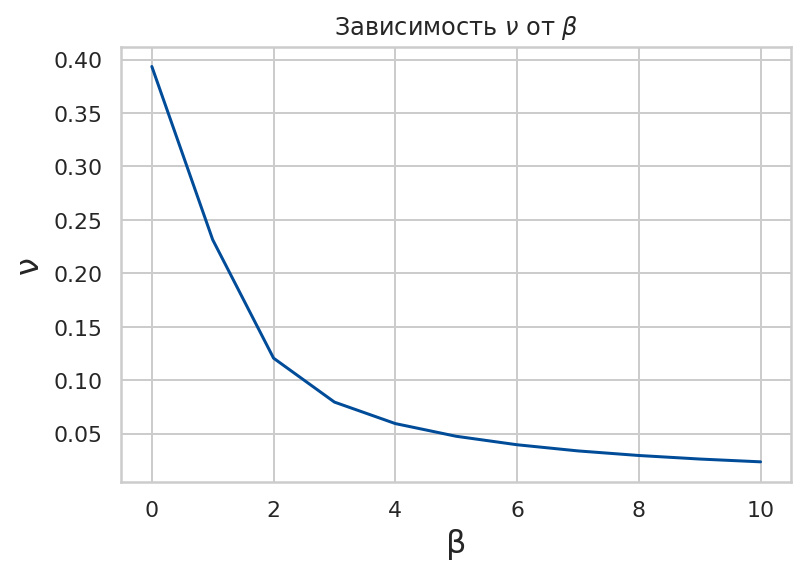

In [78]:
betas = np.linspace(0,10,11)
vals = []
for beta in betas:
    vals.append(linear_fuzzy_index(vect_g,n, domain,a,sigma,beta))
    
plt.plot(betas, vals, color = '#004C99')
plt.xlabel('β')
plt.ylabel('ν')
plt.title('Зависимость $ν$ от $β$')
plt.savefig('data/2ndtaskwithbetas.png')
plt.show()

### Номер 3

In [15]:
def d(F:Callable, G:Callable) -> np.double:
    """
                 11
        d(F,G) = ∫∫|F(x,y) - G(x/,y)|dxdy
                 00
    """
    func = lambda x,y: np.abs(F(x,y) - G(x,y))
    a,b = 0, 1
    g = lambda x: 0
    h = lambda x: 1
    J = integrate.dblquad(func, a,b, g, h)
    return J
    
def F(x:np.double,y:np.double) -> np.double:
    """
        F(x,y) = min{1, x+y}
    """
    return np.minimum(1.0,x+y)

def G(ro:np.double) -> np.double:
    """
                        x+y+2ρxy
        G(x,y) = min{1, ---------}
                        1-ρ^2xy
    """
    return lambda x,y: np.minimum(1.0, (x+y+2*ro*x*y) / (1-ro**2*x*y))

In [16]:
domain = np.linspace(-1,1,50)
values = []
for r in domain:
    v = d(F,G(r))
    values.append(v[0])

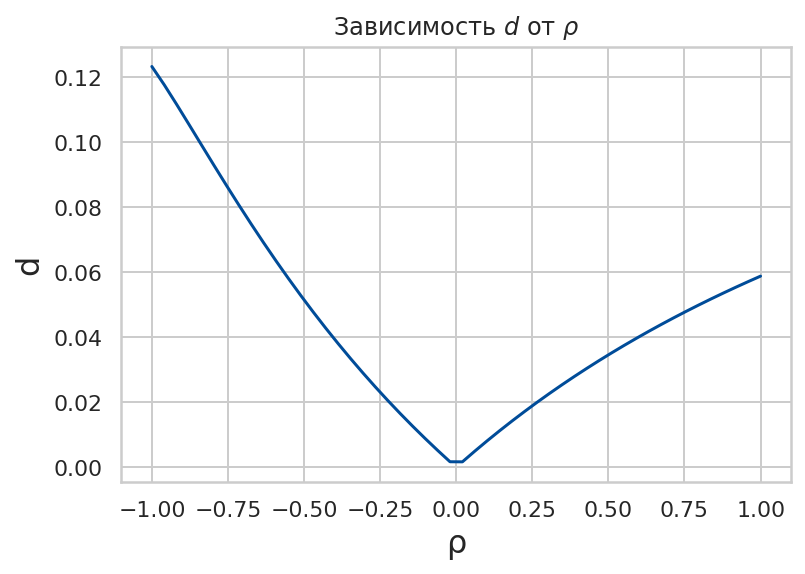

In [35]:
plt.plot(domain, values, color = '#004C99')
plt.xlabel('ρ')
plt.ylabel('d')
plt.title('Зависимость $d$ от $ρ$')
plt.savefig('data/3task.png')
plt.show()

Разделим все на 4 интеграла, и посчитаем два из них:

In [25]:
def F_1(x:np.float, y:np.float) -> np.float:
    return 1.0

def F_2(x:np.float, y:np.float) -> np.float:
    return x+y

def G(ro:np.float) -> np.float:
    return lambda x,y: (x+y+2*ro*x*y) / (1-ro**2*x*y)

In [26]:
domain = np.linspace(-1,1,50)
values_1 = []
values_2 = []

for r in domain:
    v = d(F_1,G(r))
    values_1.append(v)
    w = d(F_2,G(r))
    values_2.append(w)

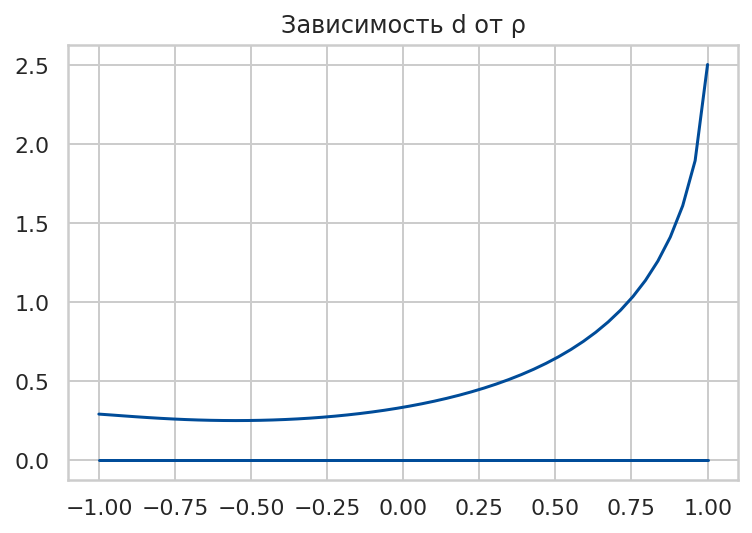

In [27]:
plt.plot(domain, values_1, color = '#004C99')
plt.title('Зависимость d от ρ')
#plt.savefig('data/3task.png')
plt.show()

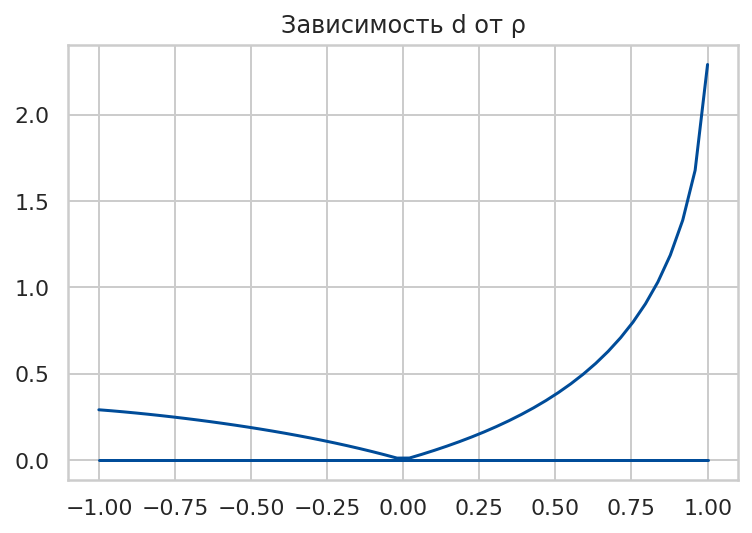

In [28]:
plt.plot(domain, values_2, color = '#004C99')
plt.title('Зависимость d от ρ')
#plt.savefig('data/3task.png')
plt.show()

### Задача 4

In [110]:
def incr_ksi(x,a):
    m = 1/(2+a)
    ins = ((3-2*x)*(1-a)) / (3*(a*(x-1)+1))
    return m*np.log(ins)

/home/snopoff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/home/snopoff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/home/snopoff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/home/snopoff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/home/snopoff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/home/snopoff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/home/snopoff/.local/l

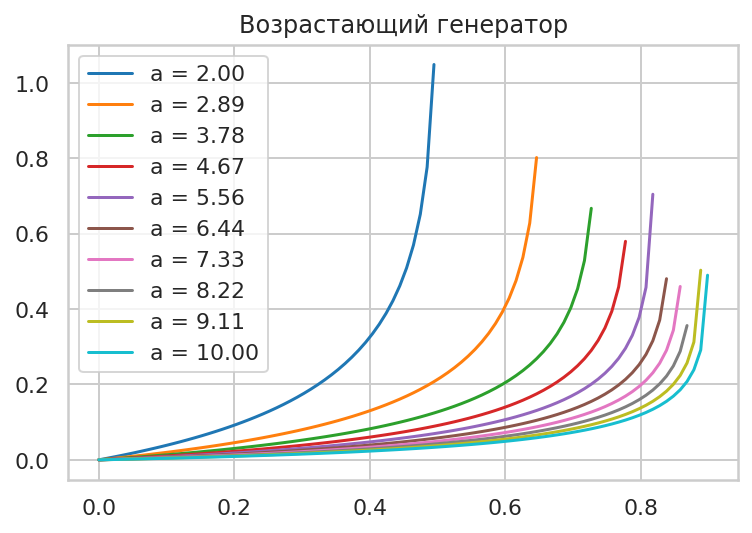

In [111]:
dom = np.linspace(0,1,100)
vk = np.vectorize(incr_ksi)
for a in np.linspace(2,10,10):
    plt.plot(dom, vk(dom,a), label = "a = {:.2f}".format(a))
    plt.legend(loc='best')
    
plt.title("Возрастающий генератор")
plt.savefig('data/incr.png')

In [112]:
def decr_ksi(x,a):
    m = 1/(2+a)
    ins = ((3-2*x)) / (a*(x-1)+1)
    return m*np.log(ins)

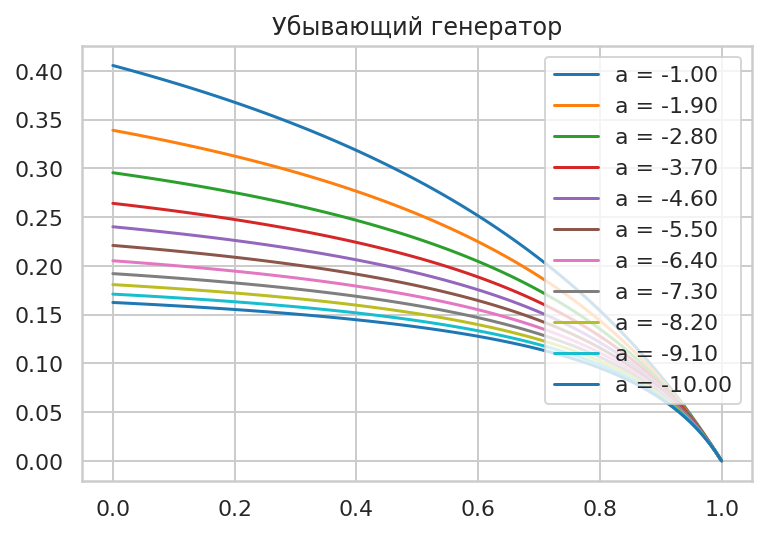

In [120]:
dom = np.linspace(0,1,100)
vk = np.vectorize(decr_ksi)
for a in np.linspace(-1,-10,11):
    plt.plot(dom, vk(dom,a), label = "a = {:.2f}".format(a))
    plt.legend(loc='best')
    
plt.title("Убывающий генератор")
plt.savefig('data/decr.png')